# Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyfiglet
from termcolor import colored
import warnings
import missingno
from summarytools import dfSummary
import pyfiglet
from tabulate import tabulate
from tqdm import tqdm

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)          # Show all columns
pd.set_option('display.width', None)                # Adjust width dynamically
pd.set_option('display.expand_frame_repr', False)   # Prevent column wrapping
warnings.filterwarnings('ignore')                   # Ignores all warnings
tqdm.pandas()                                       # Shows loading bar

In [3]:
print((pyfiglet.figlet_format("Youssef || Weam", font="slant")))

__  __                           ____   ____   _       __                   
\ \/ /___  __  _______________  / __/  / / /  | |     / /__  ____ _____ ___ 
 \  / __ \/ / / / ___/ ___/ _ \/ /_   / / /   | | /| / / _ \/ __ `/ __ `__ \
 / / /_/ / /_/ (__  |__  )  __/ __/  / / /    | |/ |/ /  __/ /_/ / / / / / /
/_/\____/\__,_/____/____/\___/_/    / / /     |__/|__/\___/\__,_/_/ /_/ /_/ 
                                   /_/_/                                    



# Load Data Set


In [4]:
df = pd.read_csv('netflix_titles.csv')

## EDA


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [9]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [10]:
def analysis(dataframe):
    for col in dataframe.columns:
        print(pyfiglet.figlet_format(col))
        print(f"Unique Values: {dataframe[col].nunique()}")
        print(f"Null Values %: {(dataframe[col].isnull().sum()/dataframe.shape[0] * 100).round(3)}")
        if dataframe[col].dtype in ['int64', 'float64']:
            print(f"Min: {dataframe[col].min()}")
            print(f'Max: {dataframe[col].max()}')
            print(f"Skewness: {dataframe[col].dropna().skew()}")
        print(dataframe[col].value_counts())
    

In [11]:
analysis(df)

     _                     _     _ 
 ___| |__   _____      __ (_) __| |
/ __| '_ \ / _ \ \ /\ / / | |/ _` |
\__ \ | | | (_) \ V  V /  | | (_| |
|___/_| |_|\___/ \_/\_/___|_|\__,_|
                     |_____|       

Unique Values: 8807
Null Values %: 0.0
show_id
s1       1
s2       1
s3       1
s4       1
s5       1
        ..
s8803    1
s8804    1
s8805    1
s8806    1
s8807    1
Name: count, Length: 8807, dtype: int64
 _                    
| |_ _   _ _ __   ___ 
| __| | | | '_ \ / _ \
| |_| |_| | |_) |  __/
 \__|\__, | .__/ \___|
     |___/|_|         

Unique Values: 2
Null Values %: 0.0
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
 _   _ _   _      
| |_(_) |_| | ___ 
| __| | __| |/ _ \
| |_| | |_| |  __/
 \__|_|\__|_|\___|
                  

Unique Values: 8807
Null Values %: 0.0
title
Dick Johnson Is Dead     1
Blood & Water            1
Ganglands                1
Jailbirds New Orleans    1
Kota Factory             1
                        ..
Zodiac         

In [12]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,show_id[object],1. s12. s23. s34. s45. s56. s67. s78. s89. s910. s1011. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)8,797 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,type[object],1. Movie2. TV Show,"6,131 (69.6%)2,676 (30.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATdJREFUeJzt281pw0AUReE3QZhkI2EEKkZFpNgUoW6E0Szi4M2Y10AwIVxxmfMtstVATvwT5pbWWgAKJSI+IuIieRr+w6O1dg9DwzzPn+M4Xs8+CF5Ta72VUr4cgxsytHVd79M0/Zx9GPzuOI73bduu+77nO5FfbPkjQ1uW5fvsw+Al+bHH0tvZB0A/iA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENs0N5ny0t5ukfir9x/T0NeM87bn86X8npSa73lDiEMMXjx83DcH6TClA8q7q9stn/lPbKe8jnP2npkO+Vzn7X1yH3KxzdoI/xTFzLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbI2E75HM/cO+spn/OsrUcMXhAqTwpbat9DkPLdAAAAAElFTkSuQmCC"">",0(0.0%)
3,title[object],1. Dick Johnson Is Dead2. Blood & Water3. Ganglands4. Jailbirds New Orleans5. Kota Factory6. Midnight Mass7. My Little Pony: A New Generati8. Sankofa9. The Great British Baking Show10. The Starling11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)8,797 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjYsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvq6yFwwAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
4,director[object],"1. nan2. Rajiv Chilaka3. Raúl Campos, Jan Suter4. Suha

<Axes: >

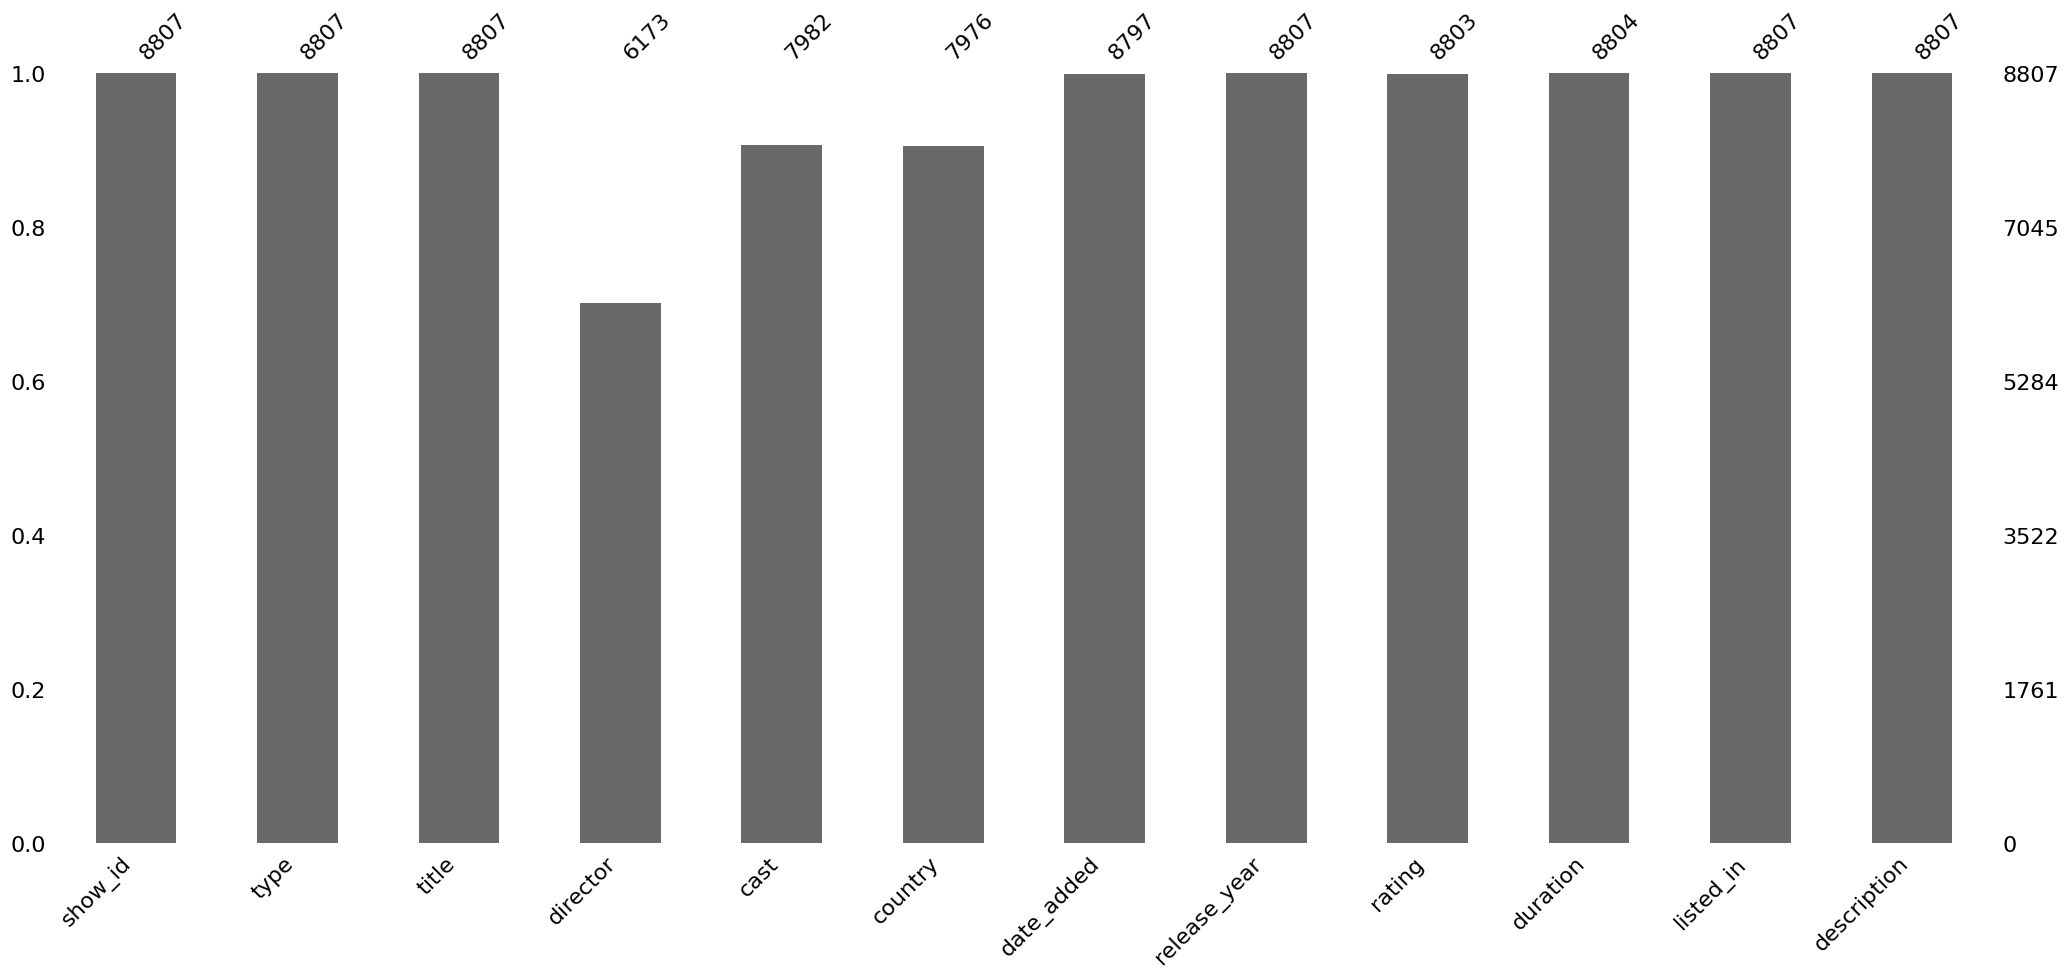

In [13]:
missingno.bar(df)

# Handling Missing Values


In [14]:
def analyze_missing(df):
    missing = pd.DataFrame({
        'column': df.columns,
        'missing_count': df.isnull().sum(),
        'missing_percentage': (df.isnull().sum() / len(df)) * 100
    })
    missing = missing[missing['missing_count'] > 0].sort_values('missing_percentage', ascending=False)
    return missing

missing_df = analyze_missing(df)
missing_df.reset_index(drop=True, inplace=True)
missing_df.set_index('column', inplace=True)
print("Missing Values Analysis:")
print(missing_df)
print("\n" + "#"*60)

Missing Values Analysis:
            missing_count  missing_percentage
column                                       
director             2634           29.908028
country               831            9.435676
cast                  825            9.367549
date_added             10            0.113546
rating                  4            0.045418
duration                3            0.034064

############################################################


In [15]:
# Handling missing Director values by filling with 'Unknown'
df['director'].fillna('Unknown', inplace=True)

In [16]:
# Handling missing country by filling with 'International'
df['country'].fillna('International', inplace=True)

In [17]:
# Handling missing cast by filling with 'Various'
df['cast'].fillna('Various', inplace=True)

In [18]:
# Handling missing date_added by filling with release_year + about 6 months

# check the all missing have release year
df[df['date_added'].isnull()]['release_year'].isnull().sum()

df['date_added'] = df.apply(
        lambda row: row['date_added'] if pd.notna(row['date_added']) 
        else f"July 1, {int(row['release_year'])}", 
        axis=1
    )

In [19]:
# Handling missing duration by filling with median duration based on type
# 1. Impute based on type (Movie vs TV Show)
# 2. Use mean / mode by type 
movie_mean = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float).mean()
tvshow_mode = df[df['type'] == 'TV Show']['duration'].str.extract('(\d+)')[0].astype(float).mode()

if not tvshow_mode.empty:
    tv_mode_value = int(tvshow_mode[0])
else:
    tv_mode_value = 1

df.loc[(df['duration'].isnull()) & (df['type'] == 'Movie'), 'duration'] = f"{int(movie_mean)} min"
df.loc[(df['duration'].isnull()) & (df['type'] == 'TV Show'), 'duration'] = f"{int(tv_mode_value)} Seasons"
df['duration'].isnull().sum()

np.int64(0)

In [20]:
# Handling missing rating based on mode by type
movie_mode = df[df['type'] == 'Movie']['rating'].mode()
tv_mode = df[df['type'] == 'TV Show']['rating'].mode()
df.loc[(df['rating'].isnull()) & (df['type'] == 'Movie'), 'rating'] = movie_mode[0]
df.loc[(df['rating'].isnull()) & (df['type'] == 'TV Show'), 'rating'] = tv_mode[0]

In [21]:
missing_df = analyze_missing(df)
missing_df.reset_index(drop=True, inplace=True)
missing_df.set_index('column', inplace=True)
print("Missing Values Analysis:")
print(missing_df)
print("\n" + "#"*60)

Missing Values Analysis:
Empty DataFrame
Columns: [missing_count, missing_percentage]
Index: []

############################################################


# Analysis


In [22]:
pie = df.groupby(["type"])["show_id"].count()
pie

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [23]:
df.groupby(["type", "duration"])["release_year"].count().to_frame()

release_year
type    duration               
Movie   10 min                1
        100 min             108
        101 min             116
        102 min             122
        103 min             114
...                         ...
TV Show 5 Seasons            65
        6 Seasons            33
        7 Seasons            23
        8 Seasons            17
        9 Seasons             9

[220 rows x 1 columns]

In [24]:
MiMax = df['release_year'].aggregate(['min', 'max'])
MiMax.to_frame()
df[df['release_year'] == MiMax['min']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,Unknown,Various,International,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [25]:
df[df['release_year'] == MiMax['max']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",International,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Various,International,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",International,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,"January 1, 2021",2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a..."
1551,s1552,TV Show,Hilda,Unknown,"Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...","United Kingdom, Canada, United States","December 14, 2020",2021,TV-Y7,2 Seasons,Kids' TV,"Fearless, free-spirited Hilda finds new friend..."
1696,s1697,TV Show,Polly Pocket,Unknown,"Emily Tennant, Shannon Chan-Kent, Kazumi Evans...","Canada, United States, Ireland","November 15, 2020",2021,TV-Y,2 Seasons,Kids' TV,After uncovering a magical locket that allows ...
2920,s2921,TV Show,Love Is Blind,Unknown,"Nick Lachey, Vanessa Lachey",United States,"February 13, 2020",2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows",Nick and Vanessa Lachey host this social exper...


# Visualization


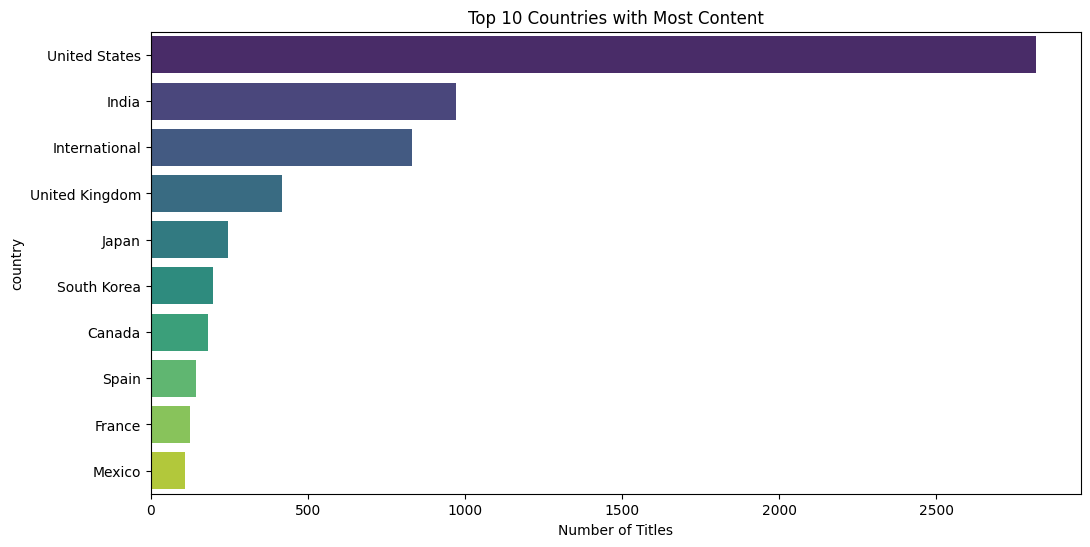

In [26]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.show()

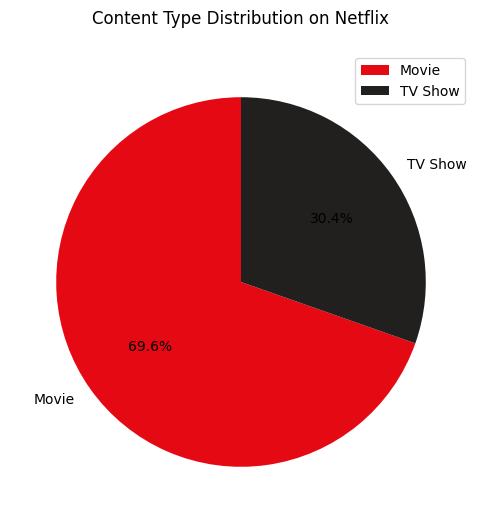

In [27]:
fig = plt.figure(figsize=(8, 6))
plt.pie(df['type'].value_counts(),
        labels=df['type'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        radius=1,
        counterclock=True,
        colors=['#e50914', '#221f1f']
        )
plt.title('Content Type Distribution on Netflix', pad=20)
plt.legend(loc ='upper right')

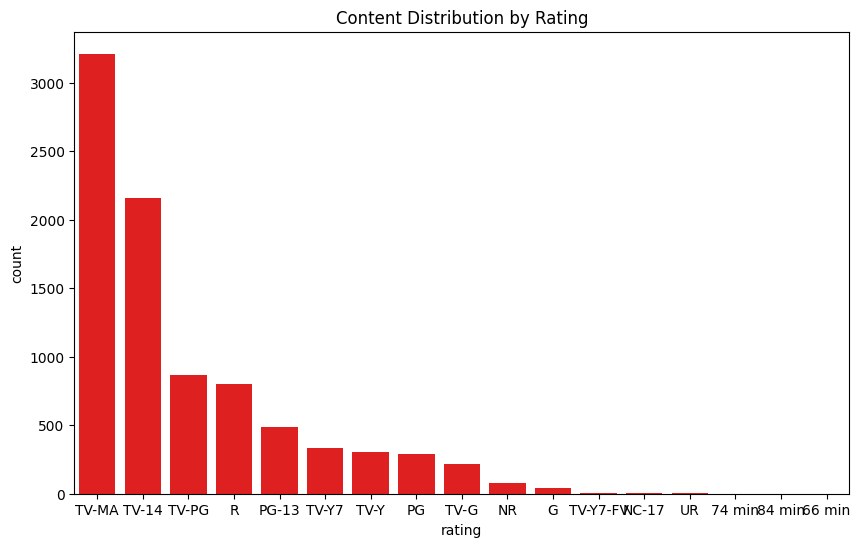

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index , color = 'red')
plt.title('Content Distribution by Rating')
plt.show()

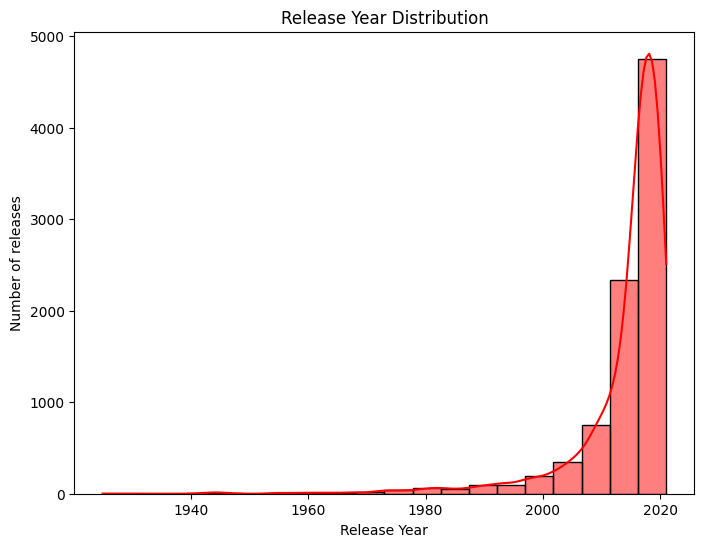

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['release_year'], bins=20, kde=True, color='red')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of releases')
plt.show()

Text(0.5, 1.0, 'Number of Titles Released Over the Years')

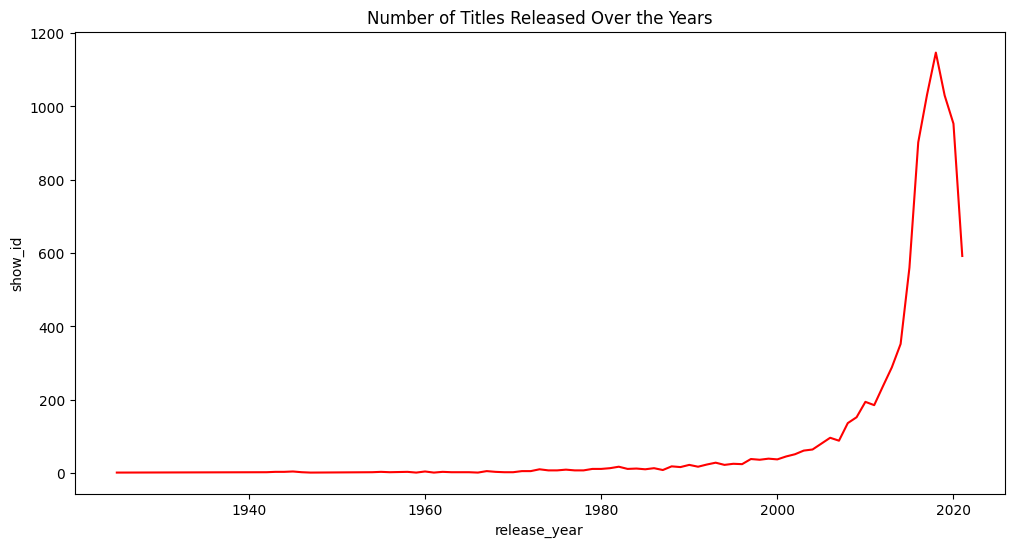

In [30]:
content_by_year = df.groupby('release_year')['show_id'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_by_year, x='release_year', y='show_id', color='red')
plt.title('Number of Titles Released Over the Years')

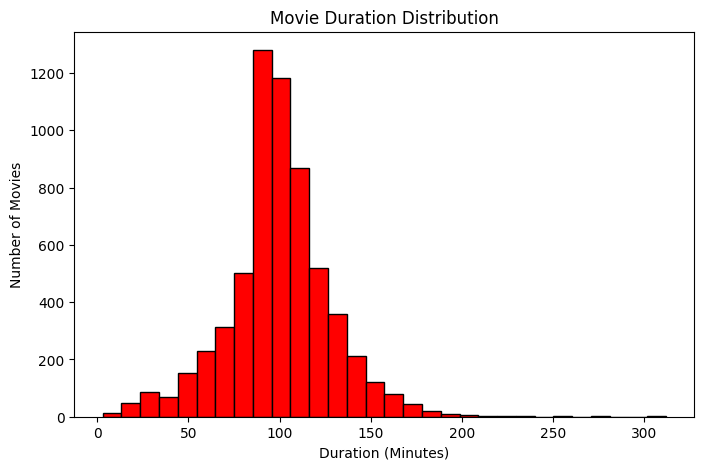

In [31]:
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(int)
movies = df[df['type'] == 'Movie']

plt.figure(figsize=(8,5))
plt.hist(
    movies['duration_value'],
    bins=30,
    color="#FF0000",
    edgecolor='black'
)
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

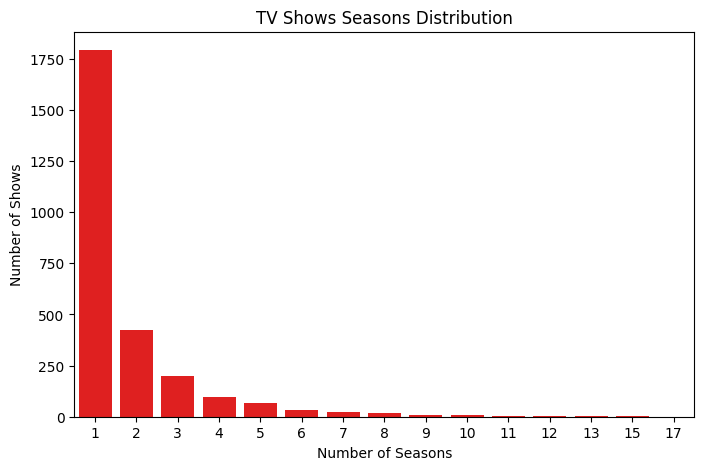

In [32]:
tv_shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(8,5))
sns.countplot(
    x='duration_value',
    data=tv_shows,
    color="#FF0000"
)
plt.title('TV Shows Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Shows')
plt.show()

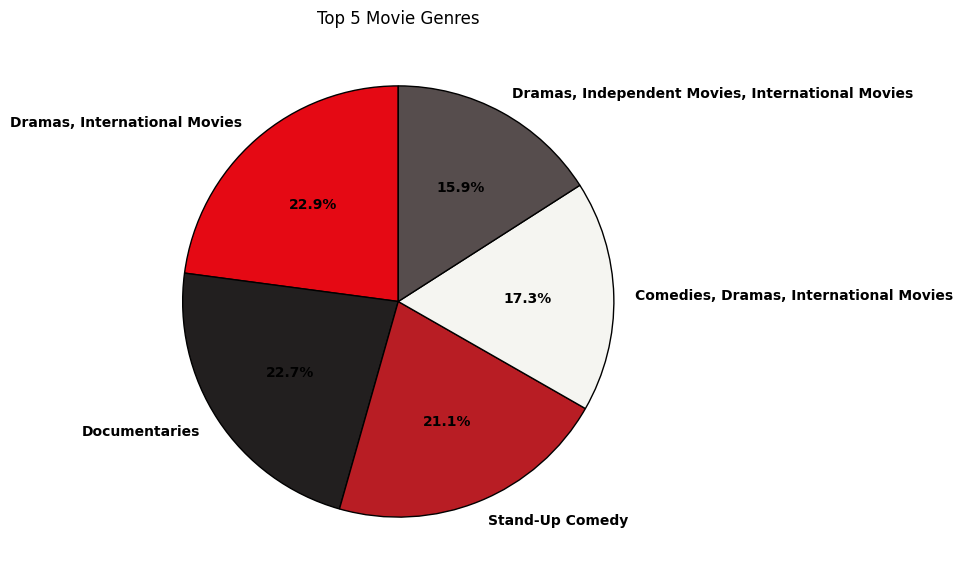

In [33]:
movie_genres = df[df['type'] == 'Movie']['listed_in'].value_counts().head(5)
colors = ['#E50914', '#221F1F', '#B81D24', '#F5F5F1', '#564D4D']
plt.figure(figsize=(7,7))
plt.pie(
    movie_genres,
    labels=movie_genres.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 10, 'fontweight': 'bold'},
)
plt.title('Top 5 Movie Genres')
plt.show()

In [34]:
df.to_csv('netflix_titles_cleaned.csv', index=False)